In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings; warnings.filterwarnings('ignore')

def standardise(vec): return (vec - vec.mean()) / vec.std()

/Users/gmr/.pyenv/versions/3.9.7/envs/lsde/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
dfdos = pd.read_csv("../../data/small/ddos_topic_attack.csv")
dfdos = dfdos[dfdos["pageID"]!="pageID"]  # weird artefact
dfdos["date"] = pd.to_datetime(dfdos.loc[:, ["year", "month", "day", "hour"]])
dfdos.drop(columns=["year", "month", "day", "hour"], inplace=True)
dfdos.set_index("date", inplace=True)
dfdos = dfdos.astype({"count":int})
dfdos

,domain,title,pageID,accessType,count,trafficType
date,,,,,,
2019-09-07 18:00:00,ar.wikipedia,هجمات_الحرمان_من_الخدمات,-1,mobile-app,2,user
2019-09-07 18:00:00,de.wikipedia,Denial_of_Service,-1,mobile-app,20,user
2019-09-07 18:00:00,pl.wikipedia,DDoS,-1,mobile-app,3,user
2019-09-07 18:00:00,pl.wikipedia,DoS,-1,mobile-app,2,user
2019-09-07 18:00:00,ru.wikipedia,DoS-атака,-1,mobile-app,1,user
...,...,...,...,...,...,...
2019-09-08 00:00:00,en.wikipedia,Denial-of-service_attack,-1,desktop,2,spider
2019-09-08 00:00:00,de.wikipedia,Denial_of_Service,-1,mobile-app,4,user
2018-09-22 02:00:00,en.wikipedia,Denial-of-service_attack,-1,desktop,1,spider


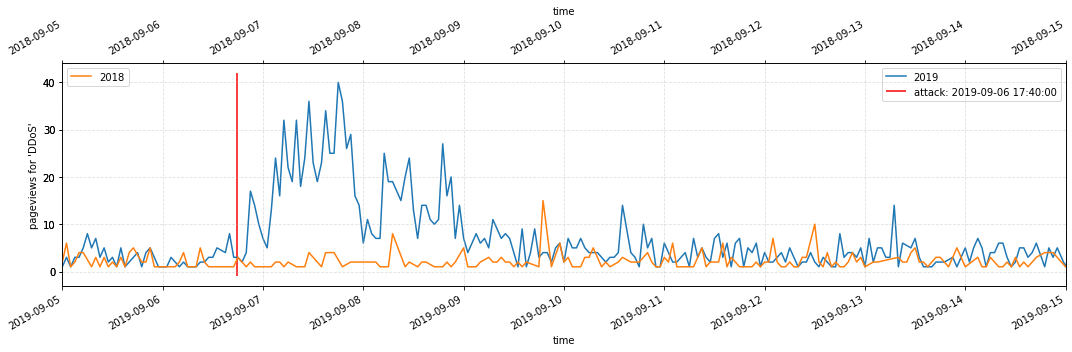

In [3]:
attack_start = datetime.datetime(2019,9,6,17,40,0)

fig, ax1 = plt.subplots(figsize=(15,5))
dfdos[dfdos.index.year==2019].groupby(["date"])["count"].sum().plot(ax=ax1, color="C0", label="2019")
ax2 = ax1.twiny()
dfdos[dfdos.index.year==2018].groupby(["date"])["count"].sum().plot(ax=ax2, color="C1", label="2018")

ax1.set_xlim(datetime.date(2019, 9, 5), datetime.date(2019, 9, 15))
ax2.set_xlim(datetime.date(2018, 9, 5), datetime.date(2018, 9, 15))
ax1.vlines(attack_start, *plt.gca().get_ylim(), color="red", label=f"attack: {attack_start}")

ax2.legend(loc=2)
ax1.legend(loc=1)

ax1.set_xlabel("time")
ax2.set_xlabel("time")
plt.ylabel("pageviews for 'DDoS'")
plt.grid(linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig("../../img/ddos_topic.png", dpi=300)
plt.show()